### Predicting the tumor is benign or melignant based on the given dataset.
In this I am classifying the human cell class into two different classes based on these data my machine learning model is going to predict the given tumor is benign or melignant.
I have tries all the classification algorithmn In those decision tree given more accurate classification than other models.

Here class 2 represent - begign
     class 4 represent - malignant.

## Importing the libraries

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

## Importing the dataset

In [62]:
dataset = pd.read_csv('Breast Cancer.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [63]:
dataset.shape

(683, 11)

In [64]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Splitting the dataset into the Training set and Test set

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the K - Nearest Neighbor Classification model on the Training set

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

## Finding best score for KNN model

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


knn_classifier = KNeighborsClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9605498721227622
Best parameters: {'max_depth': 3, 'max_features': 4}


## Training the Decision Tree Classification model on the Training set

In [69]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Finding the best score for Decision tree model

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9561381074168798
Best parameters: {'max_depth': 5, 'max_features': 1}


## Visualization of results in grid view

''

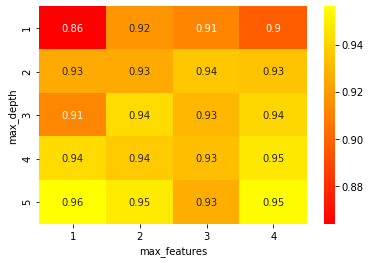

In [71]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='autumn', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
;

In [72]:
decision_tree_classifier = grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

''

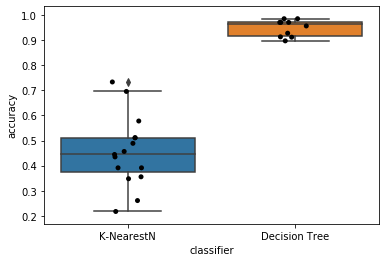

In [73]:
decision_tree_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(knn_classifier, X, y, cv=15),
                       'classifier': ['K-NearestN'] * 15})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, X, y, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')
;

## Prediction of results

''

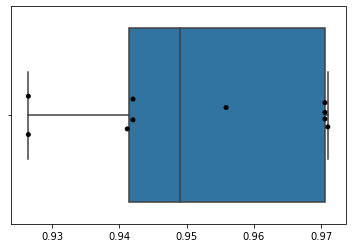

In [74]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)

sb.boxplot(dt_scores)
sb.stripplot(dt_scores, jitter=True, color='black')
;

### making confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   4]
 [  3  61]]


0.9590643274853801

Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 4	(Actual: 4)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 4	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 4	(Actual: 4)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 4	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 4)
Predicted: 2	(Actual: 2)
Predicted: 4	(Actual: 4)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 4	(Actual: 4)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 4)
Predicted: 4	(Actual: 4)
Predicted: 2	(Actual: 2)
Predicted: 2	(Actual: 2)
Predicted: 4	(Actual: 4)
Predicted: 2	(Actual: 2)


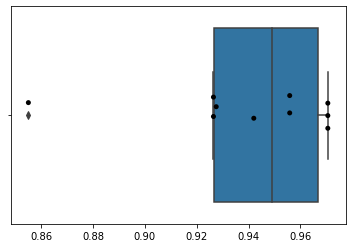

In [76]:
rf_classifier_scores = cross_val_score(decision_tree_classifier, X, y, cv=10)
sb.boxplot(rf_classifier_scores)
sb.stripplot(rf_classifier_scores, jitter=True, color='black')

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(X, y, test_size=0.25)

decision_tree_classifier.fit(training_inputs, training_classes)

for input_features, prediction, actual in zip(testing_inputs[:100],
                                              decision_tree_classifier.predict(testing_inputs[:100]),
                                              testing_classes[:100]):
    print(f'Predicted: {prediction}\t(Actual: {actual})')

Here my model predicted the breast cancer benign or malignant with 96% accuracy. 